In [1]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
import os
os.getcwd()

'D:\\ML\\jupiter_notebook\\ZIP regression model'

In [3]:
df = pd.read_csv('fish.csv', header=0)

In [4]:
print(df.head(10))

   LIVE_BAIT  CAMPER  PERSONS  CHILDREN  FISH_COUNT
0          0       0        1         0           0
1          1       1        1         0           0
2          1       0        1         0           0
3          1       1        2         1           0
4          1       0        1         0           1
5          1       1        4         2           0
6          1       0        3         1           0
7          1       0        4         3           0
8          0       1        3         2           0
9          1       1        1         0           1


In [5]:
df.groupby('FISH_COUNT').count()

,LIVE_BAIT,CAMPER,PERSONS,CHILDREN
FISH_COUNT,,,,
0,142,142,142,142
1,31,31,31,31
2,20,20,20,20
3,12,12,12,12
4,6,6,6,6
5,10,10,10,10
6,4,4,4,4
7,3,3,3,3
8,2,2,2,2


In [8]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))
# Training data set length=196
# Testing data set length=54

Training data set length=200
Testing data set length=50


In [9]:
expr = 'FISH_COUNT ~ LIVE_BAIT  + CAMPER + CHILDREN + PERSONS'

In [11]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [12]:
zip_training_results = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, inflation='logit').fit()

         Current function value: 3.150523
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [13]:
print(zip_training_results.summary())

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:              FISH_COUNT   No. Observations:                  200
Model:             ZeroInflatedPoisson   Df Residuals:                      195
Method:                            MLE   Df Model:                            4
Date:                 Sun, 30 May 2021   Pseudo R-squ.:                  0.3516
Time:                         09:00:19   Log-Likelihood:                -630.10
converged:                       False   LL-Null:                       -971.76
Covariance Type:             nonrobust   LLR p-value:                1.429e-146
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
inflate_Intercept     1.3447      1.190      1.130      0.259      -0.988       3.677
inflate_LIVE_BAIT     0.1889      1.093      0.173      0.863      -1.954       2.332
inflate_CAMPER  

In [20]:
zip_predictions = zip_training_results.predict(X_test,exog_infl=X_test)
predicted_counts=np.round(zip_predictions)
actual_counts = y_test['FISH_COUNT']

print('ZIP RMSE='+str(np.sqrt(np.sum(np.power(np.subtract(predicted_counts,actual_counts),2)))))
# ZIP RMSE=55.65069631190611


ZIP RMSE=24.879710609249457


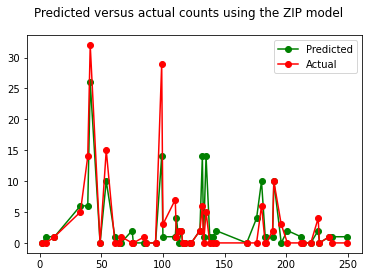

In [23]:
fig = plt.figure()
fig.suptitle('Predicted versus actual counts using the ZIP model')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual')
plt.legend(handles=[predicted, actual])
plt.show()